## **Importing the required libraries** 

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [3]:
df_mnist = tf.keras.datasets.mnist

## **Loading the data and splitting the data into Train , Test**

In [4]:
(X_train , y_train),(X_test , y_test) = df_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train , X_test = X_train / 255 ,X_test / 255 

In [6]:
X_train.shape

(60000, 28, 28)

## **Building the Model**

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)),
    tf.keras.layers.Dense(128 , activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10 , activation = 'softmax')
])

## **Compiling the Model**

In [8]:
model.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

## **Fitting the training data on our model**

In [9]:
r = model.fit(X_train , y_train ,validation_data= (X_test , y_test) , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2982 - accuracy: 0.9134 - val_loss: 0.1413 - val_accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1438 - accuracy: 0.9579 - val_loss: 0.0975 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1035 - accuracy: 0.9682 - val_loss: 0.0843 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0839 - accuracy: 0.9744 - val_loss: 0.0745 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0739 - accuracy: 0.9765 - val_loss: 0.0704 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0640 - accuracy: 0.9794 - val_loss: 0.0748 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0565 - accuracy: 0.9818 - val_loss: 0.0689 - val_accuracy

In [10]:
pred = model.predict(X_test)

## **Plotting the loss per iteration**

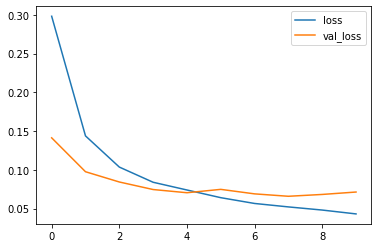

In [11]:
plt.plot(r.history['loss'] , label ='loss')
plt.plot(r.history['val_loss'] , label ='val_loss')
plt.legend()

# **Plotting accuracy per iteration**

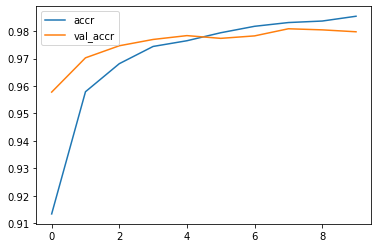

In [12]:
plt.plot(r.history['accuracy'] , label ='accr')
plt.plot(r.history['val_accuracy'] , label ='val_accr')
plt.legend()

# **Checking misclassified examples**

In [19]:
pred.argmax(axis = 1)

array([3.60908370e-09, 5.97137273e-09, 3.15569253e-07, 8.50021570e-06,
       9.45429546e-15, 1.67347947e-09, 2.86925702e-13, 9.99990225e-01,
       1.15904655e-08, 9.29545536e-07], dtype=float32)

Text(0.5, 1.0, 'True label : 5 and predicted label is: 4')

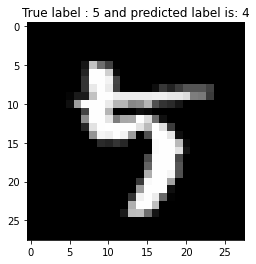

In [36]:
misclassified_eg = np.where(pred.argmax(axis = 1) != y_test)[0]
i = np.random.choice(misclassified_eg)
plt.imshow(X_test[i] , cmap = "gray")
plt.title(f"True label : {y_test[i]} and predicted label is: {pred.argmax(axis = 1)[i]}")